# Load the Data set in to working directory

In [1]:
# Step 1: Install the Kaggle and KaggleHub libraries
# ------------------------------------------------------------------------------
# We use pip to install the necessary packages.
!pip install -q kaggle kagglehub

#==============================================================================
#  Part 2: Download the 'Dermnet' dataset using KaggleHub and Save to Drive
# ==============================================================================
# We will use the modern kagglehub library to download the dataset.
# It downloads to a local cache, and then we'll copy it to Google Drive.

import kagglehub
import os
import shutil

print("Downloading 'Dermnet' dataset with kagglehub...")
# This downloads the dataset to a temporary cache location and returns the path.
# The files are automatically unzipped.
cached_path = kagglehub.dataset_download("shubhamgoel27/dermnet")
print(f"Dataset downloaded to cache: {cached_path}")

# Define the path in your Google Drive where you want to save the dataset
working_path = '/content/Skin_desease_classification/dermnet'

os.makedirs(working_path, exist_ok=True)

# Now, we copy the files from the cache to your persistent Google Drive folder.
print(f"Copying dataset from cache to your directory at: {working_path}")

# Define the required classes
required_classes = ["Nail Fungus and other Nail Disease",
"Hair Loss Photos Alopecia and other Hair Diseases",
"Melanoma Skin Cancer Nevi and Moles",
"Vasculitis Photos",
"Acne and Rosacea Photos",
"Scabies Lyme Disease and other Infestations and Bites",
"Herpes HPV and other STDs Photos",
"Vascular Tumors"]

# Define the subdirectories within the cached path that contain the image classes
subdirs_to_copy_from = ["test", "train"]

for subdir in subdirs_to_copy_from:
    source_subdir_path = os.path.join(cached_path, subdir)
    destination_subdir_path = os.path.join(working_path, subdir)

    # Create the destination subdirectory
    os.makedirs(destination_subdir_path, exist_ok=True)

    if os.path.isdir(source_subdir_path):
        print(f"Processing subdirectory: {subdir}")
        # Loop through all items within the subdirectory
        for item in os.listdir(source_subdir_path):
            source_item = os.path.join(source_subdir_path, item)
            destination_item = os.path.join(destination_subdir_path, item)

            # Only copy if the item is a directory and is in the required_classes list
            if os.path.isdir(source_item) and item in required_classes:
                print(f"  Copying class: {item}")
                # Use copytree for directories
                shutil.copytree(source_item, destination_item, dirs_exist_ok=True)
            elif not os.path.isdir(source_item):
                 # Copy files (like metadata files) directly
                 shutil.copy2(source_item, destination_item)


print("\nSubset of Dataset successfully stored in your working directory!")

Dataset downloaded to cache: /kaggle/input/dermnet
Copying dataset from cache to your directory at: /content/Skin_desease_classification/dermnet
Processing subdirectory: test
  Copying class: Acne and Rosacea Photos
  Copying class: Vascular Tumors
  Copying class: Hair Loss Photos Alopecia and other Hair Diseases
  Copying class: Melanoma Skin Cancer Nevi and Moles
  Copying class: Nail Fungus and other Nail Disease
  Copying class: Scabies Lyme Disease and other Infestations and Bites
  Copying class: Herpes HPV and other STDs Photos
  Copying class: Vasculitis Photos
Processing subdirectory: train
  Copying class: Acne and Rosacea Photos
  Copying class: Vascular Tumors
  Copying class: Hair Loss Photos Alopecia and other Hair Diseases
  Copying class: Melanoma Skin Cancer Nevi and Moles
  Copying class: Nail Fungus and other Nail Disease
  Copying class: Scabies Lyme Disease and other Infestations and Bites
  Copying class: Herpes HPV and other STDs Photos
  Copying class: Vasculit

In [2]:
import os
import shutil
from pathlib import Path


def create_subset_of_data(source_dir, destination_dir, num_images_per_class=200):

  # Create destination directory if it doesn't exist
  os.makedirs(destination_dir, exist_ok=True)

  # Loop through each class folder
  for class_folder in os.listdir(source_dir):
      source_class_path = os.path.join(source_dir, class_folder)
      dest_class_path = os.path.join(destination_dir, class_folder)

      # Only proceed if it is a directory
      if os.path.isdir(source_class_path):
          os.makedirs(dest_class_path, exist_ok=True)

          # List image files and take the first num_images_per_class
          image_files = [f for f in os.listdir(source_class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
          selected_images = image_files[:num_images_per_class]

          # Copy selected images
          for img_file in selected_images:
              src_path = os.path.join(source_class_path, img_file)
              dst_path = os.path.join(dest_class_path, img_file)
              shutil.copy(src_path, dst_path)

  print("✅ Subset creation completed successfully!")


In [3]:
def get_files_list(data_path):

  classes=os.listdir(data_path)
  dic={}
  for i in classes:
      dic[i]= len(os.listdir(os.path.join(data_path,i)))
  print(f"{'=' * 10} Total Classes {len(dic.keys())} {'=' * 10} \n")
  for key,value in dic.items():
      print(key,":",value,"\n")
  return dic



In [4]:
# Source and destination paths for train data
source_dir = "/content/Skin_desease_classification/dermnet/train"
destination_dir = "/content/Skin_desease_classification/dermnet/sub_dermanet/train"

create_subset_of_data(source_dir, destination_dir, 200)

✅ Subset creation completed successfully!


In [5]:
_ = get_files_list(destination_dir)

========== Total Classes 8 ========== 

Nail Fungus and other Nail Disease : 200 

Acne and Rosacea Photos : 200 

Herpes HPV and other STDs Photos : 200 

Melanoma Skin Cancer Nevi and Moles : 200 

Vascular Tumors : 200 

Vasculitis Photos : 200 

Scabies Lyme Disease and other Infestations and Bites : 200 

Hair Loss Photos Alopecia and other Hair Diseases : 200 



In [6]:
# Source and destination paths for test data
source_dir = "/content/Skin_desease_classification/dermnet/test"
destination_dir = "/content/Skin_desease_classification/dermnet/sub_dermanet/test"

create_subset_of_data(source_dir, destination_dir, 20)

✅ Subset creation completed successfully!


In [7]:
_ = get_files_list(destination_dir)

========== Total Classes 8 ========== 

Nail Fungus and other Nail Disease : 20 

Acne and Rosacea Photos : 20 

Herpes HPV and other STDs Photos : 20 

Melanoma Skin Cancer Nevi and Moles : 20 

Vascular Tumors : 20 

Vasculitis Photos : 20 

Scabies Lyme Disease and other Infestations and Bites : 20 

Hair Loss Photos Alopecia and other Hair Diseases : 20 



In [8]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
train_dir = "/content/Skin_desease_classification/dermnet/sub_dermanet/train"
test_dir = "/content/Skin_desease_classification/dermnet/sub_dermanet/test"

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


# visulaizing the images
for category in required_classes:
  #constructing the path
  path = os.path.join(train_dir, category)
  images = os.listdir(path)

  fig, ax = plt.subplots(1, 3, figsize = (10, 4))
  fig.suptitle(f'{category}', fontsize = 18)

  for i in range(3):
    img_name = images[np.random.randint(0, len(images))]
    img_path = os.path.join(path, img_name)
    img_array = cv2.imread(img_path)

    # converting the BGR images to RGB
    img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

    ax[i].imshow(img_rgb)
    ax[i].axis('off')


Output hidden; open in https://colab.research.google.com to view.

In [11]:
import os
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# CONFIG
# =============================
img_size = (224, 224)
batch_size = 32
seed = 42

# =============================
# Load Datasets
# =============================
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

class_names = train_ds.class_names
num_classes = len(class_names)

# =============================
# Compute Class Weights
# =============================
labels = []
for _, label_batch in train_ds.unbatch():
    labels.append(label_batch.numpy())

class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weight_dict = dict(enumerate(class_weights_array))

# =============================
# Augmentation Layer
# =============================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])


Found 1600 files belonging to 8 classes.
Using 1280 files for training.
Found 1600 files belonging to 8 classes.
Using 320 files for validation.
Found 160 files belonging to 8 classes.


In [12]:
class_names

['Acne and Rosacea Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Vascular Tumors',
 'Vasculitis Photos']

In [13]:
# =============================
# Model Building (Transfer Learning)
# =============================
from tensorflow.keras.applications import ConvNeXtTiny
from tensorflow.keras import layers, models


def build_model(trainable_base=False):
    base_model = ConvNeXtTiny(include_top=False, weights="imagenet", input_shape=img_size + (3,))
    base_model.trainable = trainable_base

    inputs = tf.keras.Input(shape=img_size + (3,))
    x = data_augmentation(inputs)
    x = base_model(x, training=trainable_base)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

model = build_model(trainable_base=False)

# =============================
# Compile and Train (Top Layers)
# =============================
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_tiny (Functional)      │ (None, 7, 7, 768)      │    27,820,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 768)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         6,152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,826,280 (106.15 MB)

 Trainable params: 6,152 (24.03 KB)

 Non-trainable params: 27,820,128 (106.13 MB)

In [15]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("base_model_covn_bo_sub200_class8.keras", save_best_only=True, monitor='val_loss')
]


In [16]:
print("🟡 Training top layers...")
history = model.fit(
    train_ds.cache().prefetch(tf.data.AUTOTUNE),
    validation_data=val_ds.cache().prefetch(tf.data.AUTOTUNE),
    epochs=40,
    class_weight=class_weight_dict,
    callbacks=callbacks
)


🟡 Training top layers...
Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 42s 631ms/step - accuracy: 0.2009 - loss: 2.1901 - val_accuracy: 0.4000 - val_loss: 1.6624
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 403ms/step - accuracy: 0.4053 - loss: 1.6948 - val_accuracy: 0.5250 - val_loss: 1.4487
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 412ms/step - accuracy: 0.5108 - loss: 1.4725 - val_accuracy: 0.5531 - val_loss: 1.3726
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 425ms/step - accuracy: 0.5445 - loss: 1.3868 - val_accuracy: 0.5719 - val_loss: 1.3254
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 413ms/step - accuracy: 0.5530 - loss: 1.3249 - val_accuracy: 0.5906 - val_loss: 1.3008
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 464ms/step - accuracy: 0.5665 - loss: 1.2777 - val_accuracy: 0.5875 - val_loss: 1.2782
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 406ms/step - accuracy: 0.5866 - loss: 1.2605 - val_accuracy: 0.5906 - val_loss: 1.2581
Epoch 8/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 413ms/step - accuracy: 0.6173 

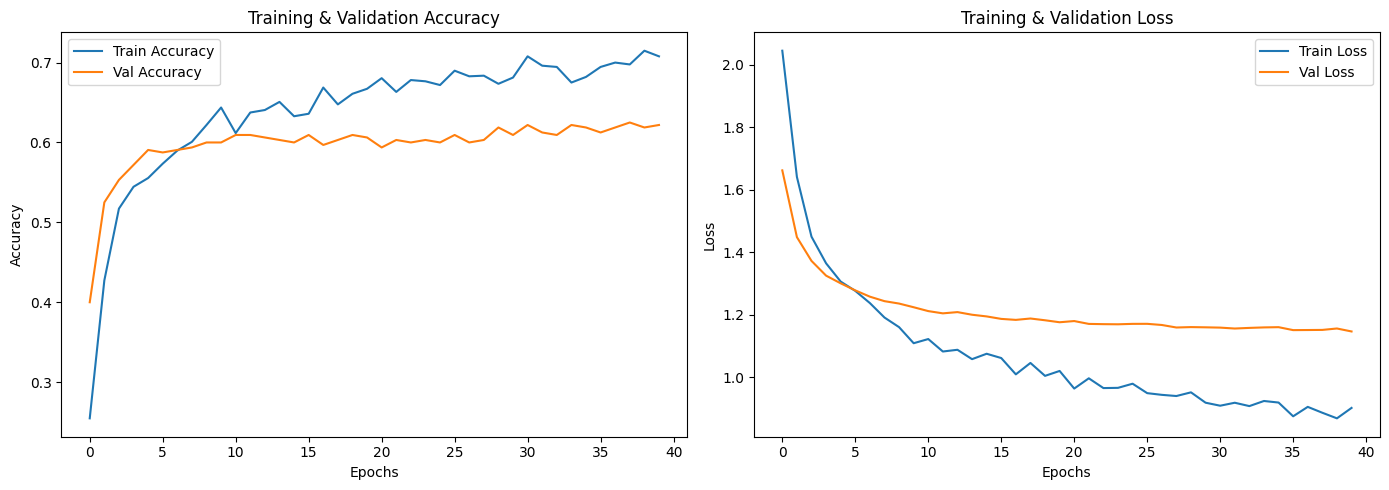

In [17]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call it with your history
plot_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


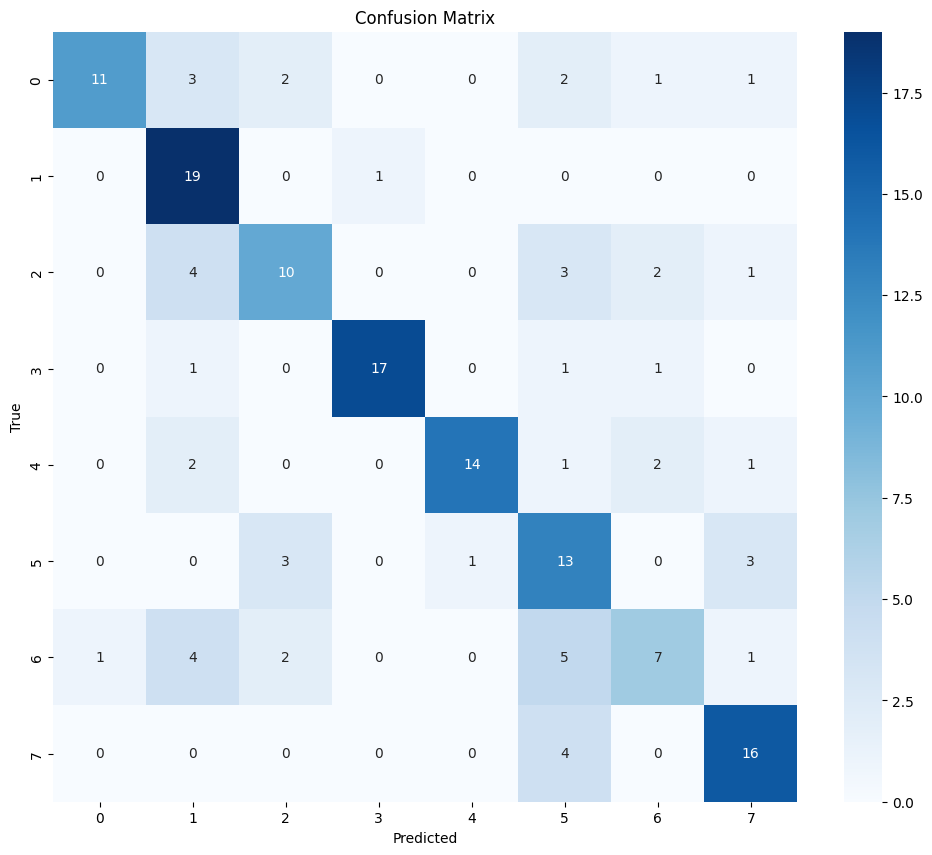

                                                       precision    recall  f1-score   support

                              Acne and Rosacea Photos       0.92      0.55      0.69        20
    Hair Loss Photos Alopecia and other Hair Diseases       0.58      0.95      0.72        20
                     Herpes HPV and other STDs Photos       0.59      0.50      0.54        20
                  Melanoma Skin Cancer Nevi and Moles       0.94      0.85      0.89        20
                   Nail Fungus and other Nail Disease       0.93      0.70      0.80        20
Scabies Lyme Disease and other Infestations and Bites       0.45      0.65      0.53        20
                                      Vascular Tumors       0.54      0.35      0.42        20
                                    Vasculitis Photos       0.70      0.80      0.74        20

                                             accuracy                           0.67       160
                                            macr

In [18]:
# Get predictions
def get_prediction(model):

  y_true = []
  y_pred = []

  for images, labels in test_ds:
      preds = model.predict(images)
      y_true.extend(labels.numpy())
      y_pred.extend(np.argmax(preds, axis=1))

  # Confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(12, 10))
  sns.heatmap(cm, annot=True, cmap='Blues')
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.show()

  # Classification report
  class_names = test_ds.class_names
  print(classification_report(y_true, y_pred, target_names=class_names))

# base model prediction
get_prediction(model)